In [1]:
import pandas as pd

In [2]:
names=["id", "gender", "age", "occupation", "zip_code"]
users_data = pd.read_table('data/ml-1m/users.dat', sep='::', engine='python', names=names)
users_data

,id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [3]:
names=["userid", "movieid", "rating", "timestamp"]
ratings_data = pd.read_table('data/ml-1m/ratings.dat', sep='::', engine='python', names=names)
ratings_data

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
names=["id", "title", "genre"]
movies_data = pd.read_table('data/ml-1m/movies.dat', sep='::', engine='python', encoding='windows-1251', names=names)
movies_data

,id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
users_data.isnull().sum()

id            0
gender        0
age           0
occupation    0
zip_code      0
dtype: int64

In [6]:
merged_table0 = ratings_data.merge(users_data, left_on='userid', right_on='id')
merged_table0

,userid,movieid,rating,timestamp,id,gender,age,occupation,zip_code
0,1,1193,5,978300760,1,F,1,10,48067
1,1,661,3,978302109,1,F,1,10,48067
2,1,914,3,978301968,1,F,1,10,48067
3,1,3408,4,978300275,1,F,1,10,48067
4,1,2355,5,978824291,1,F,1,10,48067
...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,6040,M,25,6,11106
1000205,6040,1094,5,956704887,6040,M,25,6,11106
1000206,6040,562,5,956704746,6040,M,25,6,11106
1000207,6040,1096,4,956715648,6040,M,25,6,11106


In [7]:
# dtype 'object' is text
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [8]:
all_data = merged_table0.merge(movies_data, left_on='movieid', right_on='id')
all_data

,userid,movieid,rating,timestamp,id_x,gender,age,occupation,zip_code,id_y,title,genre
0,1,1193,5,978300760,1,F,1,10,48067,1193,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,2,M,56,16,70072,1193,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,12,M,25,12,32793,1193,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,15,M,25,7,22903,1193,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,17,M,50,1,95350,1193,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,5949,M,18,17,47901,2198,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,5675,M,35,14,30030,2703,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,5780,M,18,17,92886,2845,White Boys (1999),Drama
1000207,5851,3607,5,957756608,5851,F,18,20,55410,3607,One Little Indian (1973),Comedy|Drama|Western


In [9]:
age_arr = users_data.age.unique()
sorted(age_arr)

[1, 18, 25, 35, 45, 50, 56]

In [10]:
mean_ratings = all_data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjжrlighetens kjшtere) (1995),NaN,3.500000


In [11]:
ratings_by_title = all_data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjжrlighetens kjшtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [12]:
ratings_by_title.sort_values(ascending=False)

title
American Beauty (1999)                                       3428
Star Wars: Episode IV - A New Hope (1977)                    2991
Star Wars: Episode V - The Empire Strikes Back (1980)        2990
Star Wars: Episode VI - Return of the Jedi (1983)            2883
Jurassic Park (1993)                                         2672
                                                             ... 
Target (1995)                                                   1
I Don't Want to Talk About It (De eso no se habla) (1993)       1
An Unforgettable Summer (1994)                                  1
Never Met Picasso (1996)                                        1
Full Speed (1996)                                               1
Length: 3706, dtype: int64

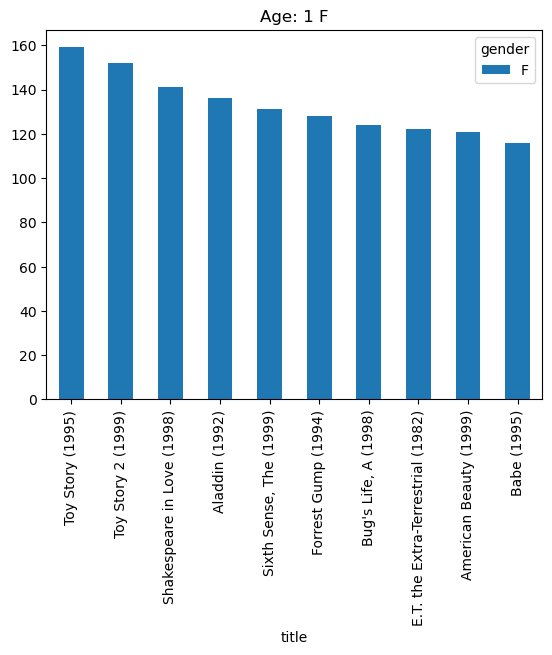

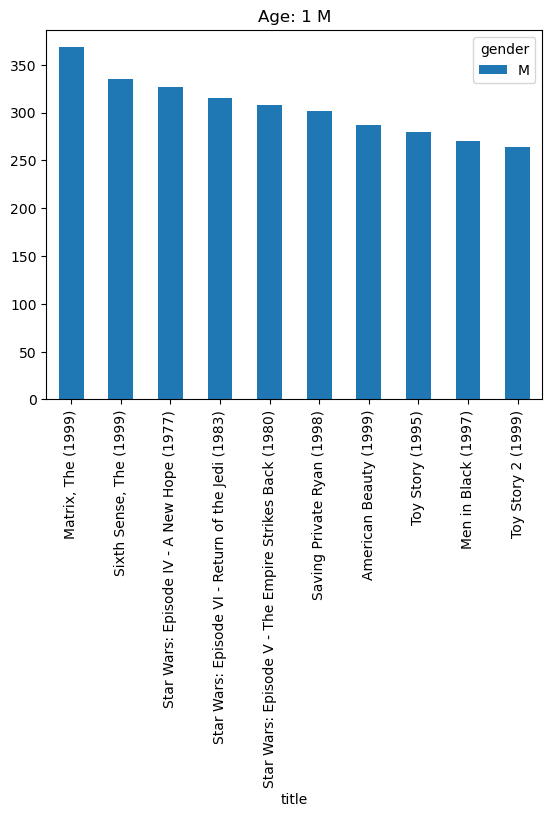

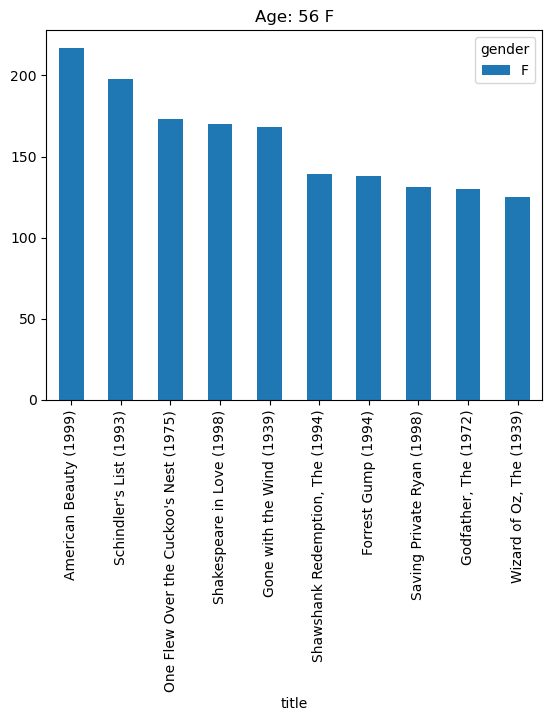

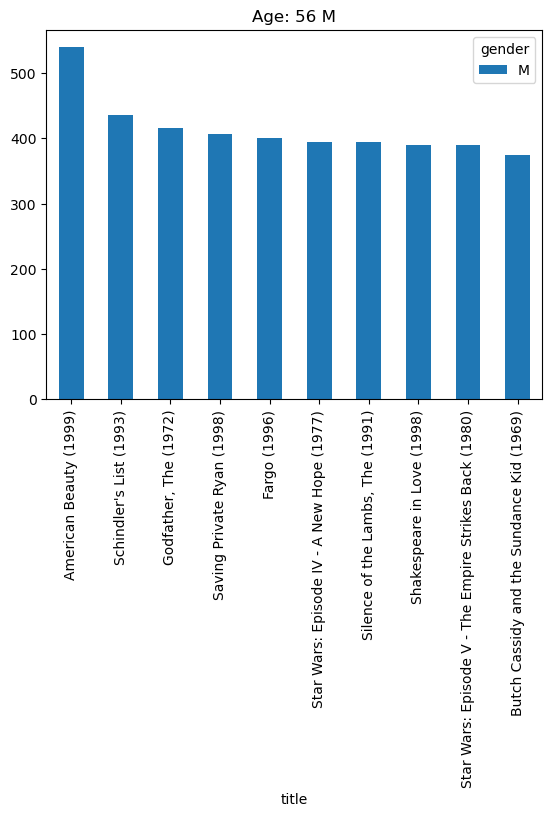

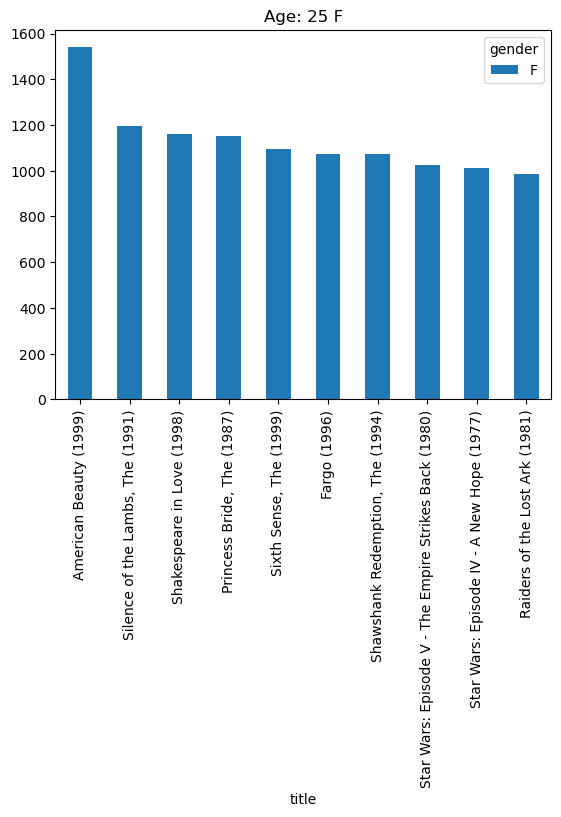

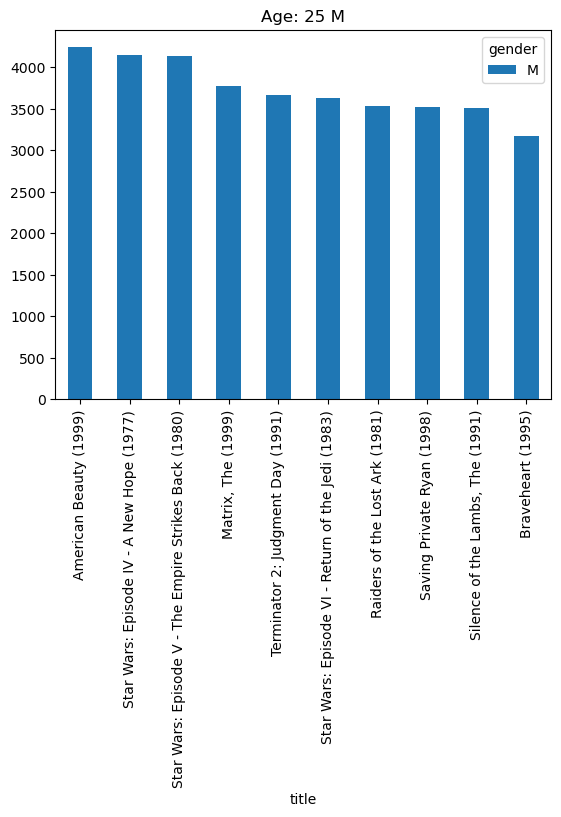

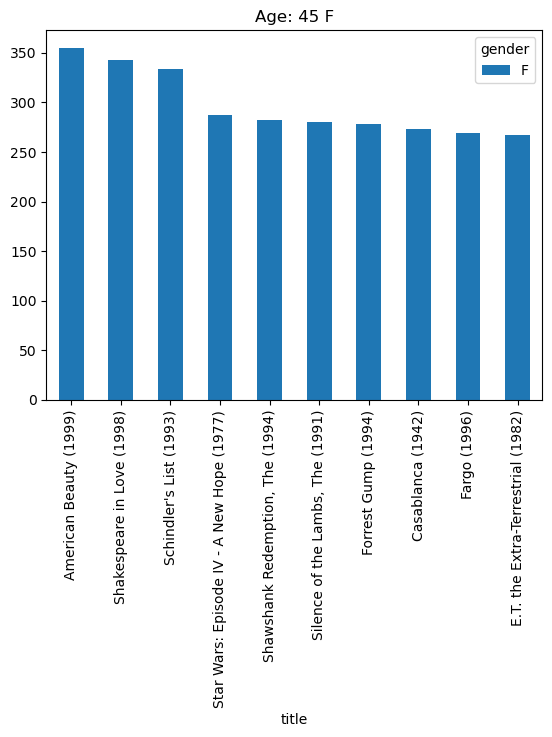

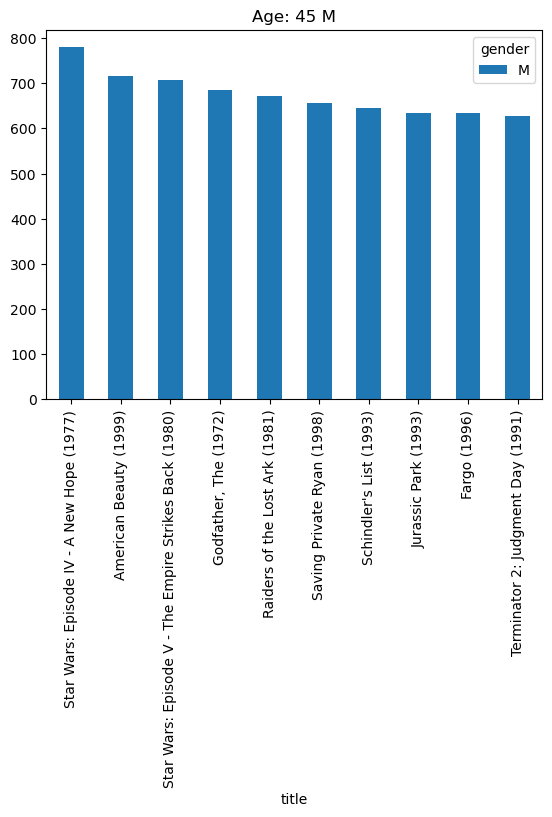

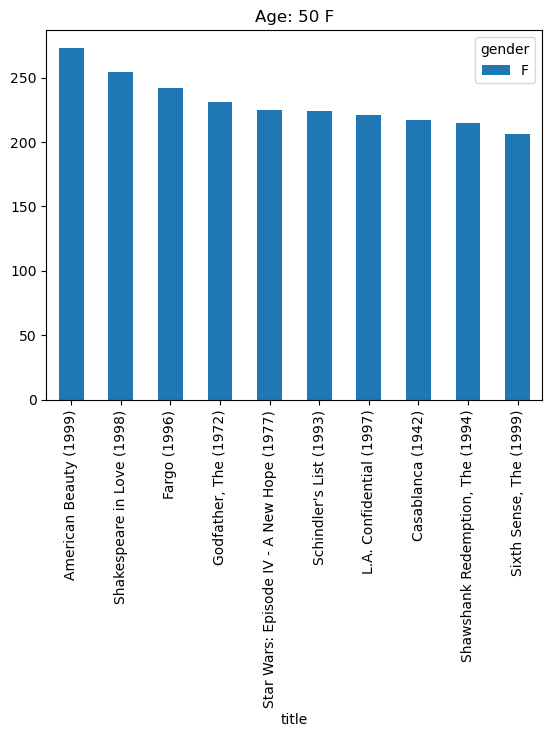

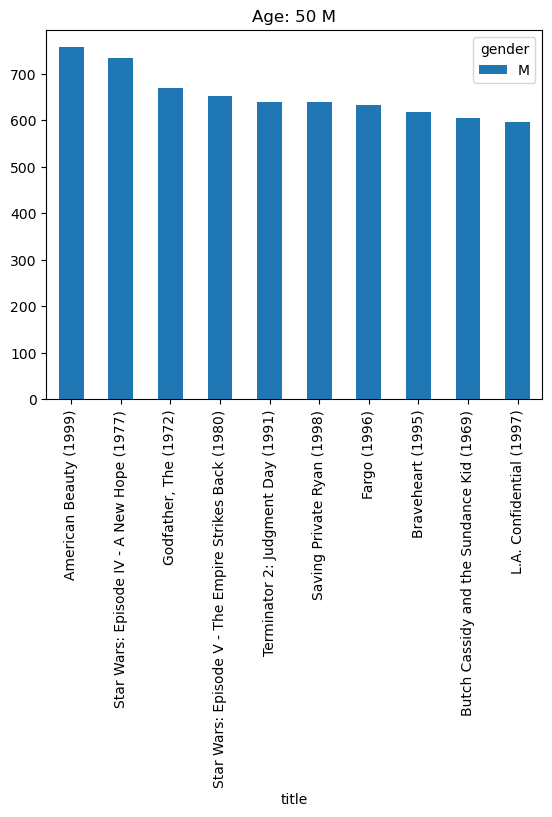

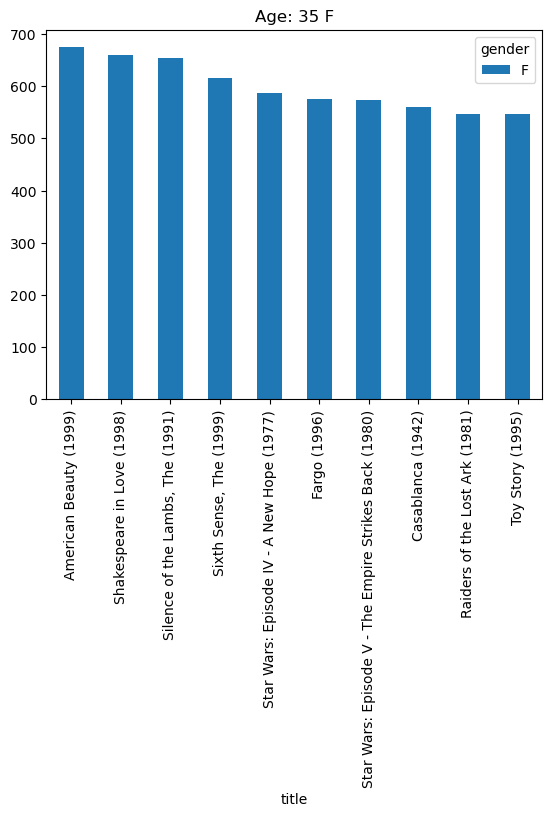

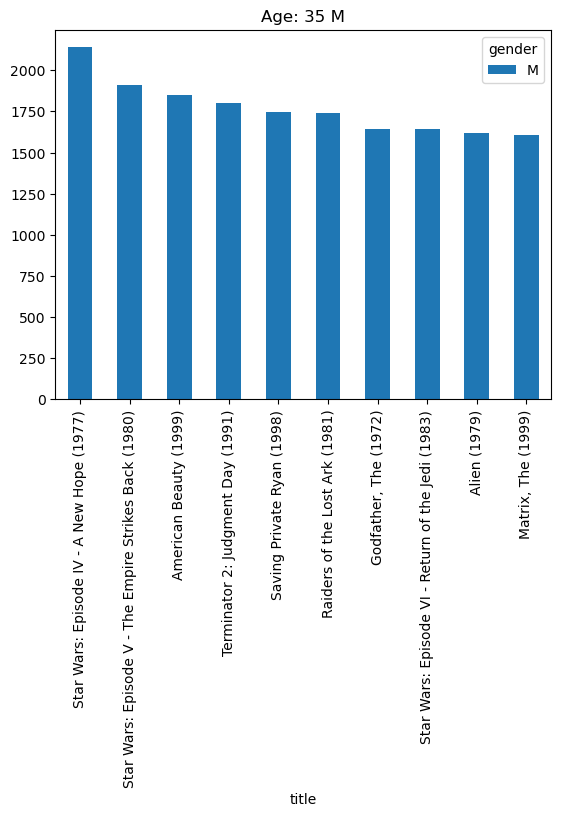

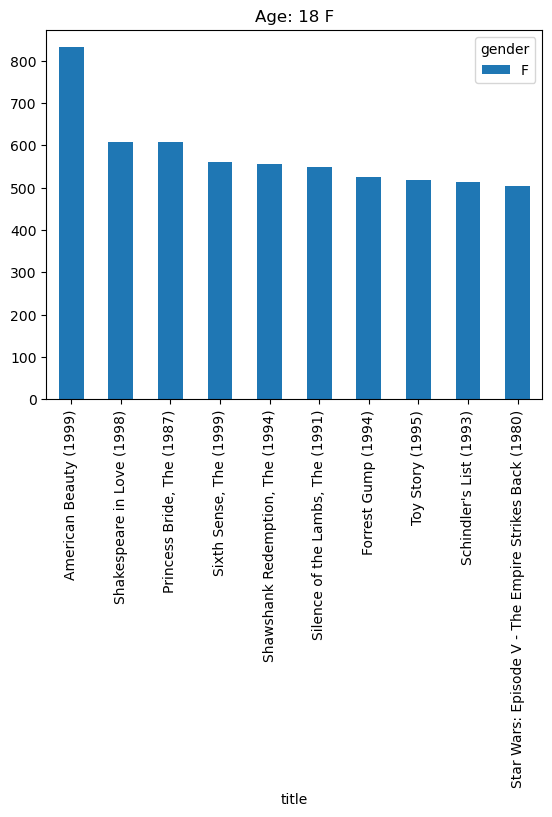

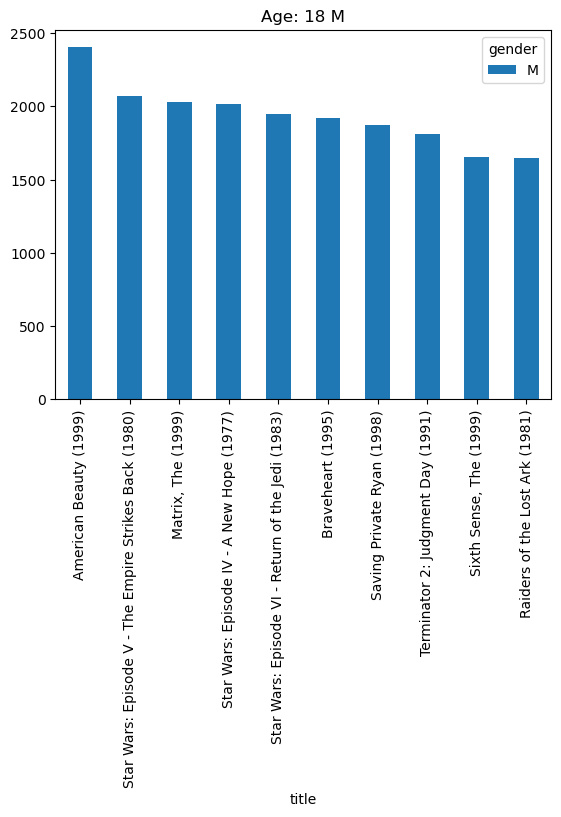

In [32]:
# group & sort by categories: gender, age
ratings_by_age = all_data.pivot_table('rating', index='title', columns=['age', 'gender'], aggfunc='sum')
# ratings_by_age.sort_index(axis=1, ascending=False)
# ratings_by_age.loc[:, [1]].sort_index(axis=1, ascending=True)
# ratings_by_age[:10]
# ratings_by_age.loc[:, [18][0]].loc[:, ['F']].sort_values(ascending=False, by='F')[:10]

for age in age_arr:
    # print(f'\n========== Age: {age} ==========')
    rbaf = ratings_by_age.loc[:, [age][0]].loc[:, ['F']].sort_values(ascending=False, by='F')[:10]
    #print(rbaf[rbaf['F']==5.0])
    # print(rbaf)
    rbaf.plot(legend=True, rot='90', title=f'Age: {age} F', kind='bar')
    print('\n')
    rbam = ratings_by_age.loc[:, [age][0]].loc[:, ['M']].sort_values(ascending=False, by='M')[:10]
    # print(rbam)
    rbam.plot(legend=True, rot='90', title=f'Age: {age} M', kind='bar')
    #print(rbam[rbam['M']==5.0])
    #
